Sample

## Load a pre-trained model

In [3]:
from DynGenModels.configs.registered_experiments import Config_JetClass_DeepSets_CondFlowMatch
from DynGenModels.models.experiment import Experiment

path = '../../results/qcd_to_top.ConditionalFlowMatching.DeepSets.2024.02.15_21h28'
cfm = Experiment(Config_JetClass_DeepSets_CondFlowMatch, path=path, DEVICE='cuda:2', NUM_SAMPLING_STEPS=300)
cfm.load()

+---------------------+-------------------------------------------------+
| Parameters          | Values                                          |
+---------------------+-------------------------------------------------+
| NAME                | qcd_to_top                                      |
| DATASET             | jetclass                                        |
| DATA_SOURCE         | qcd                                             |
| DATA_TARGET         | top                                             |
| NUM_CONSTITUENTS    | 30                                              |
| FEATURES            | ['pt_rel', 'eta_rel', 'phi_rel']                |
| PREPROCESS          | ['normalize', 'logit_transform', 'standardize'] |
| DIM_INPUT           | 3                                               |
| DEVICE              | cuda:0                                          |
| OPTIMIZER           | Adam                                            |
| LR                  | 0.0001        

### Generate samples from model:

In [4]:
from DynGenModels.datamodules.jetclass.dataprocess import PostProcessJetClassData as PostProcessor
cfm.generate_samples(cfm.dataset.source_preprocess[:10000], PostProcessor=PostProcessor)


INFO: neural ODE solver with midpoint method and steps=300


  0%|          | 0/40 [00:00<?, ?it/s]

/home/df630/.conda/envs/flow_match_env/lib/python3.9/site-packages/torchdyn/numerics/odeint.py:84: UserWarning: Setting tolerances has no effect on fixed-step methods
  warn("Setting tolerances has no effect on fixed-step methods")


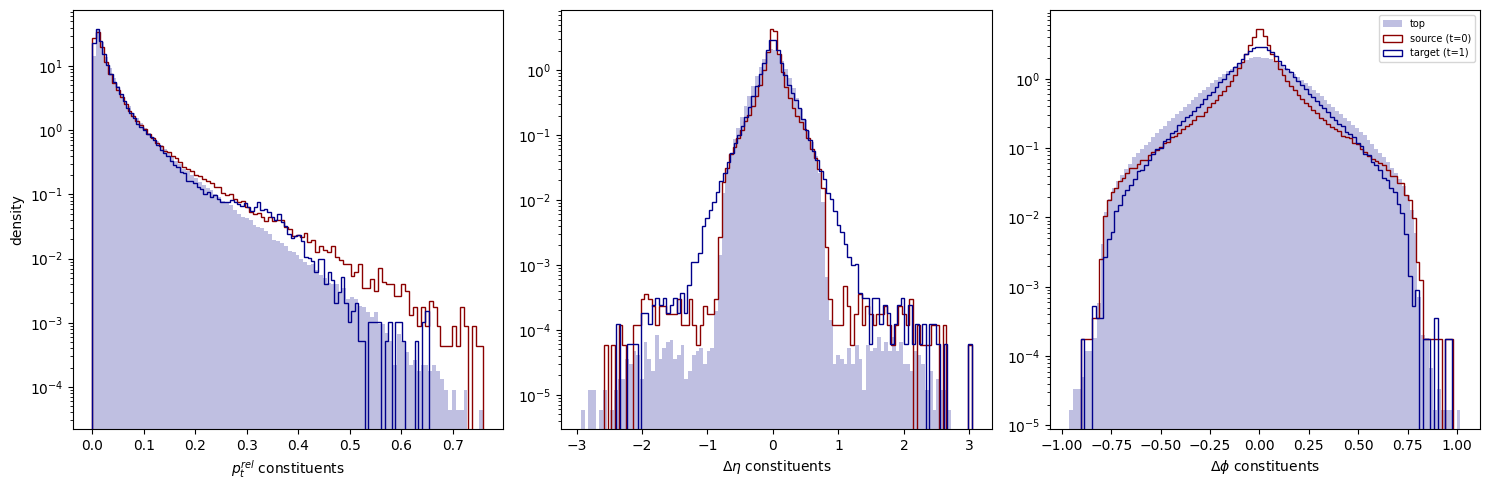

In [5]:
from utils import plot_jet_trajectories

plot_jet_trajectories(cfm, bins=[100,100,100])